<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part_2_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 5.0MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=42a58c4a9bb1b31665a024925ff4cc3740eb8dce52a6e19b3d80c16ef66e2041
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [4]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [5]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [6]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [7]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [8]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [9]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [10]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [11]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [12]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,846.773754,7.056563e+01,82.660616,737.282611,1.108256e+02,151.891750,1.530916
1,202.915598,1.020728e-01,796.982330,202.891419,6.666925e-02,797.041912,1.433681
2,202.845900,-2.250223e-10,797.154100,202.845900,-1.949754e-10,797.154100,1.642211
3,202.845900,1.513083e-10,797.154100,202.845900,-1.682923e-10,797.154100,1.678093
4,292.671384,9.347644e+01,613.852172,284.455134,8.745525e+01,628.089612,0.314807
...,...,...,...,...,...,...,...
995,975.244627,1.272215e+01,12.033220,974.386666,1.314005e+01,12.473283,0.068068
996,464.981453,1.526399e+02,382.378630,454.230449,1.516945e+02,394.075058,0.153711
997,202.845912,1.778659e-05,797.154070,202.845908,1.213937e-05,797.154080,1.285526
998,202.845900,-3.691114e-11,797.154100,202.845900,-3.580689e-11,797.154100,1.837782


In [13]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [14]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,8.087980e-01,4.584591e-01,0.103695,6.713171e-01,7.200819e-01,0.190516,0.765439
1,8.754332e-05,6.631587e-04,0.999785,5.717728e-05,4.331788e-04,0.999859,0.716793
2,5.150880e-13,1.630658e-12,1.000000,5.372924e-13,1.826537e-12,1.000000,0.821117
3,8.546497e-13,4.075647e-12,1.000000,5.770939e-13,1.999909e-12,1.000000,0.839069
4,1.128242e-01,6.073087e-01,0.770055,1.025111e-01,5.682344e-01,0.787908,0.157039
...,...,...,...,...,...,...,...
995,9.701623e-01,8.265477e-02,0.015095,9.691485e-01,8.537657e-02,0.015615,0.033599
996,3.292523e-01,9.916889e-01,0.479680,3.157694e-01,9.856244e-01,0.494336,0.076445
997,1.525082e-08,1.155611e-07,1.000000,1.040953e-08,7.887780e-08,1.000000,0.642674
998,7.835954e-13,2.852801e-12,1.000000,7.810419e-13,2.860723e-12,1.000000,0.918959


In [50]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [52]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [53]:
from sklearn.metrics import mean_absolute_error

In [54]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [55]:
params['eval_metric'] = "mae"

In [56]:
num_boost_round = 999

In [57]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[02:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.218723
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.194138
[2]	Test-mae:0.178215
[3]	Test-mae:0.166214
[4]	Test-mae:0.157026
[5]	Test-mae:0.153324
[6]	Test-mae:0.151874
[7]	Test-mae:0.149451
[8]	Test-mae:0.146675
[9]	Test-mae:0.146639
[10]	Test-mae:0.143891
[11]	Test-mae:0.144147
[12]	Test-mae:0.141563
[13]	Test-mae:0.140518
[14]	Test-mae:0.140853
[15]	Test-mae:0.139298
[16]	Test-mae:0.139898
[17]	Test-mae:0.138692
[18]	Test-mae:0.13791
[19]	Test-mae:0.137265
[20]	Test-mae:0.136456
[21]	Test-mae:0.135723
[22]	Test-mae:0.136171
[23]	Test-mae:0.136265
[24]	Test-mae:0.135526
[25]	Test-mae:0.134405
[26]	Test-mae:0.134246
[27]	Test-mae:0.133895
[28]	Test-mae:0.132882
[29]	Test-mae:0.132808
[30]	Test-mae:0.132404
[31]	Test-mae:0.132348
[32]	Test-mae:0.131517
[33]	Test-mae:0.131381
[34]	Test-mae:0.131538
[35]	Test-mae:0.130525


In [59]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results


[02:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.210003,0.002292,0.217677,0.004609
1,0.180825,0.002701,0.195539,0.004002
2,0.160216,0.002639,0.180149,0.002330
3,0.145333,0.002861,0.170197,0.002015
4,0.133865,0.003228,0.162117,0.001380
...,...,...,...,...
276,0.002636,0.000212,0.117495,0.005301
277,0.002617,0.000208,0.117493,0.005296
278,0.002604,0.000196,0.117481,0.005289
279,0.002587,0.000183,0.117477,0.005289


In [60]:
cv_results['test-mae-mean'].min()

0.11746919999999998

In [61]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [63]:
 #Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[02:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.10391779999999999 for 313 rounds
CV with max_depth=9, min_child_weight=6
[02:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

In [64]:
params['max_depth'] = 11
params['min_child_weight'] = 5

In [65]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [66]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[02:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.10351360000000001 for 192 rounds
CV with subsample=1.0, colsample=0.9
[02:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

In [67]:
params['subsample'] = .8
params['colsample_bytree'] = .8

In [71]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
CV with eta=0.3
[02:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1.63 s, sys: 29 ms, total: 1.66 s
Wall time: 1.66 s
	MAE 0.1012738 for 139 rounds

CV with eta=0.2
[02:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:18] WARNING: /workspace/src/objectiv

In [73]:
params['eta'] = .1

In [74]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[02:51:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.240839
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.229147
[2]	Test-mae:0.217135
[3]	Test-mae:0.206837
[4]	Test-mae:0.198343
[5]	Test-mae:0.190672
[6]	Test-mae:0.183123
[7]	Test-mae:0.176235
[8]	Test-mae:0.170905
[9]	Test-mae:0.165756
[10]	Test-mae:0.161153
[11]	Test-mae:0.157719
[12]	Test-mae:0.154284
[13]	Test-mae:0.151489
[14]	Test-mae:0.14787
[15]	Test-mae:0.145574
[16]	Test-mae:0.142649
[17]	Test-mae:0.140275
[18]	Test-mae:0.138466
[19]	Test-mae:0.137658
[20]	Test-mae:0.13674
[21]	Test-mae:0.1356
[22]	Test-mae:0.133921
[23]	Test-mae:0.13359
[24]	Test-mae:0.132374
[25]	Test-mae:0.131007
[26]	Test-mae:0.12946
[27]	Test-mae:0.128919
[28]	Test-mae:0.128462
[29]	Test-mae:0.12828
[30]	Test-mae:0.127125
[31]	Test-mae:0.125967
[32]	Test-mae:0.125543
[33]	Test-mae:0.124355
[34]	Test-mae:0.124101
[35]	Test-mae:0.123072
[36]	T

In [75]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[02:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.240839
[1]	Test-mae:0.229147
[2]	Test-mae:0.217135
[3]	Test-mae:0.206837
[4]	Test-mae:0.198343
[5]	Test-mae:0.190672
[6]	Test-mae:0.183123
[7]	Test-mae:0.176235
[8]	Test-mae:0.170905
[9]	Test-mae:0.165756
[10]	Test-mae:0.161153
[11]	Test-mae:0.157719
[12]	Test-mae:0.154284
[13]	Test-mae:0.151489
[14]	Test-mae:0.14787
[15]	Test-mae:0.145574
[16]	Test-mae:0.142649
[17]	Test-mae:0.140275
[18]	Test-mae:0.138466
[19]	Test-mae:0.137658
[20]	Test-mae:0.13674
[21]	Test-mae:0.1356
[22]	Test-mae:0.133921
[23]	Test-mae:0.13359
[24]	Test-mae:0.132374
[25]	Test-mae:0.131007
[26]	Test-mae:0.12946
[27]	Test-mae:0.128919
[28]	Test-mae:0.128462
[29]	Test-mae:0.12828
[30]	Test-mae:0.127125
[31]	Test-mae:0.125967
[32]	Test-mae:0.125543
[33]	Test-mae:0.124355
[34]	Test-mae:0.124101
[35]	Test-mae:0.123072
[36]	Test-mae:0.123281
[37]	Test-mae:0.122632
[38]	Test-mae:0.

In [76]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.09070308686796105

In [77]:
best_model.save_model("my_model.model")

In [81]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[02:57:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


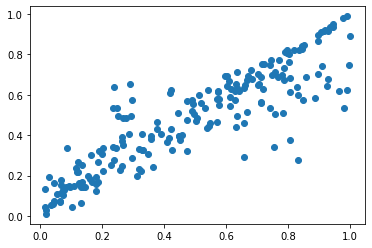

In [80]:
plt.scatter(y_test,p)

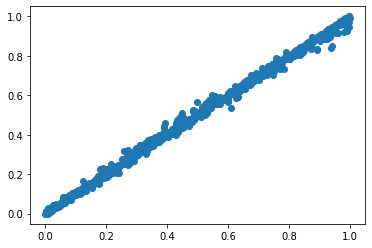

In [83]:
plt.scatter(y_train,q)

In [84]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, p))
r2_test = r2_score(y_test, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.01616753797341032
R2 score of training set is 0.996943856477438


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.13618168379896295
R2 score of test set is 0.7792247152168906
